In [19]:
import pandas as pd

In [21]:
df = pd.read_csv(r"C:\Users\Dell\gitproject\Energy_Demand_Forecasting\data\processed\Energy Consumption Cleaned.csv")

In [23]:
df.head()

,Unnamed: 0,States,Regions,latitude,longitude,Date,Energy Consumption
0,0,Punjab,NR,31.519974,75.980003,2019-02-01,119.9
1,1,Haryana,NR,28.450006,77.019991,2019-02-01,130.3
2,2,Rajasthan,NR,26.449999,74.639981,2019-02-01,234.1
3,3,Delhi,NR,28.669993,77.230004,2019-02-01,85.8
4,4,UP,NR,27.599981,78.050006,2019-02-01,313.9


In [25]:
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)


In [27]:
df.head()

,Unnamed: 0,States,Regions,latitude,longitude,Energy Consumption
Date,,,,,,
2019-02-01,0,Punjab,NR,31.519974,75.980003,119.9
2019-02-01,1,Haryana,NR,28.450006,77.019991,130.3
2019-02-01,2,Rajasthan,NR,26.449999,74.639981,234.1
2019-02-01,3,Delhi,NR,28.669993,77.230004,85.8
2019-02-01,4,UP,NR,27.599981,78.050006,313.9


In [29]:
df.drop('Unnamed: 0', axis=1, inplace=True)

In [31]:
df.head()

,States,Regions,latitude,longitude,Energy Consumption
Date,,,,,
2019-02-01,Punjab,NR,31.519974,75.980003,119.9
2019-02-01,Haryana,NR,28.450006,77.019991,130.3
2019-02-01,Rajasthan,NR,26.449999,74.639981,234.1
2019-02-01,Delhi,NR,28.669993,77.230004,85.8
2019-02-01,UP,NR,27.599981,78.050006,313.9


In [35]:
monthly_data = df.groupby(['States', pd.Grouper(freq='M')])['Energy Consumption'].sum().reset_index()


C:\Users\Dell\AppData\Local\Temp\ipykernel_1528\4256702550.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_data = df.groupby(['States', pd.Grouper(freq='M')])['Energy Consumption'].sum().reset_index()


In [37]:
monthly_data

,States,Date,Energy Consumption
0,Andhra Pradesh,2019-01-31,4238.7
1,Andhra Pradesh,2019-02-28,4858.2
2,Andhra Pradesh,2019-03-31,5249.3
3,Andhra Pradesh,2019-04-30,5356.7
4,Andhra Pradesh,2019-05-31,5393.3
...,...,...,...
523,West Bengal,2019-12-31,4199.9
524,West Bengal,2020-01-31,4473.2
525,West Bengal,2020-02-29,4205.7
526,West Bengal,2020-03-31,4341.8


In [39]:
yearly_data = df.groupby(['States', pd.Grouper(freq='Y')])['Energy Consumption'].sum().reset_index()


C:\Users\Dell\AppData\Local\Temp\ipykernel_1528\4069448881.py:1: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  yearly_data = df.groupby(['States', pd.Grouper(freq='Y')])['Energy Consumption'].sum().reset_index()


In [41]:
yearly_data

,States,Date,Energy Consumption
0,Andhra Pradesh,2019-12-31,63097.0
1,Andhra Pradesh,2020-12-31,21383.7
2,Arunachal Pradesh,2019-12-31,750.5
3,Arunachal Pradesh,2020-12-31,258.4
4,Assam,2019-12-31,8979.4
...,...,...,...
61,UP,2020-12-31,38546.9
62,Uttarakhand,2019-12-31,12864.5
63,Uttarakhand,2020-12-31,4487.6
64,West Bengal,2019-12-31,49868.7


In [43]:
monthly_national = df.groupby(pd.Grouper(freq='M'))['Energy Consumption'].sum().reset_index()


C:\Users\Dell\AppData\Local\Temp\ipykernel_1528\4267094028.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_national = df.groupby(pd.Grouper(freq='M'))['Energy Consumption'].sum().reset_index()


In [45]:
monthly_national

,Date,Energy Consumption
0,2019-01-31,86378.7
1,2019-02-28,96830.1
2,2019-03-31,100800.2
3,2019-04-30,105784.6
4,2019-05-31,105696.8
5,2019-06-30,103935.3
6,2019-07-31,86516.5
7,2019-08-31,106520.2
8,2019-09-30,104324.3
9,2019-10-31,107514.5


In [47]:
yearly_comparison =  df.groupby([df.index.year, 'States'])['Energy Consumption'].sum().unstack(0)
yearly_comparison.columns = ['2019', '2020']
yearly_comparison['% Change'] = ((yearly_comparison['2020'] - yearly_comparison['2019']) / yearly_comparison['2019']) * 100


In [49]:
yearly_comparison

,2019,2020,% Change
States,,,
Andhra Pradesh,63097.0,21383.7,-66.109799
Arunachal Pradesh,750.5,258.4,-65.569620
Assam,8979.4,3031.9,-66.234938
Bihar,30007.9,10026.9,-66.585799
Chandigarh,1472.4,521.8,-64.561261
Chhattisgarh,30179.9,10214.4,-66.154957
DNH,5845.4,2053.1,-64.876655
Delhi,29458.3,10747.6,-63.515885
Goa,4006.5,1331.4,-66.769000


C:\Users\Dell\AppData\Local\Temp\ipykernel_1528\901225942.py:6: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df[df['States'] == state]['Energy Consumption'].resample('M').sum().plot(title=f"Monthly Energy Consumption: {state}")


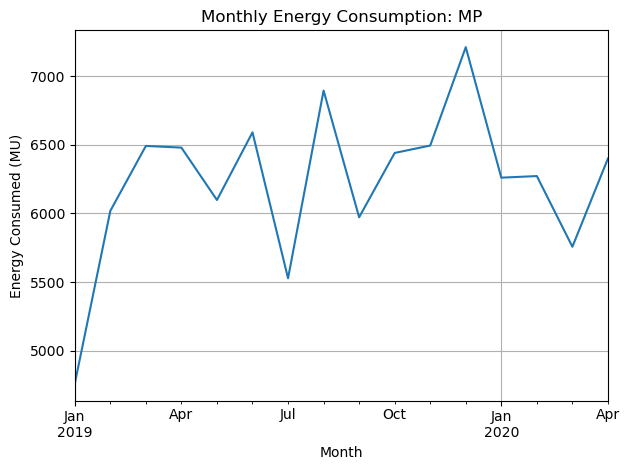

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns

# Example: Monthly trend for a specific state
state = 'MP'
df[df['States'] == state]['Energy Consumption'].resample('M').sum().plot(title=f"Monthly Energy Consumption: {state}")
plt.ylabel('Energy Consumed (MU)')
plt.xlabel('Month')
plt.grid(True)
plt.tight_layout()
plt.show()


Time Series Decomposition


In [56]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose


C:\Users\Dell\AppData\Local\Temp\ipykernel_1528\1696443573.py:13: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_data = state_df['Energy Consumption'].resample('M').sum()
C:\Users\Dell\AppData\Local\Temp\ipykernel_1528\1696443573.py:16: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  monthly_data = monthly_data.fillna(method='ffill')


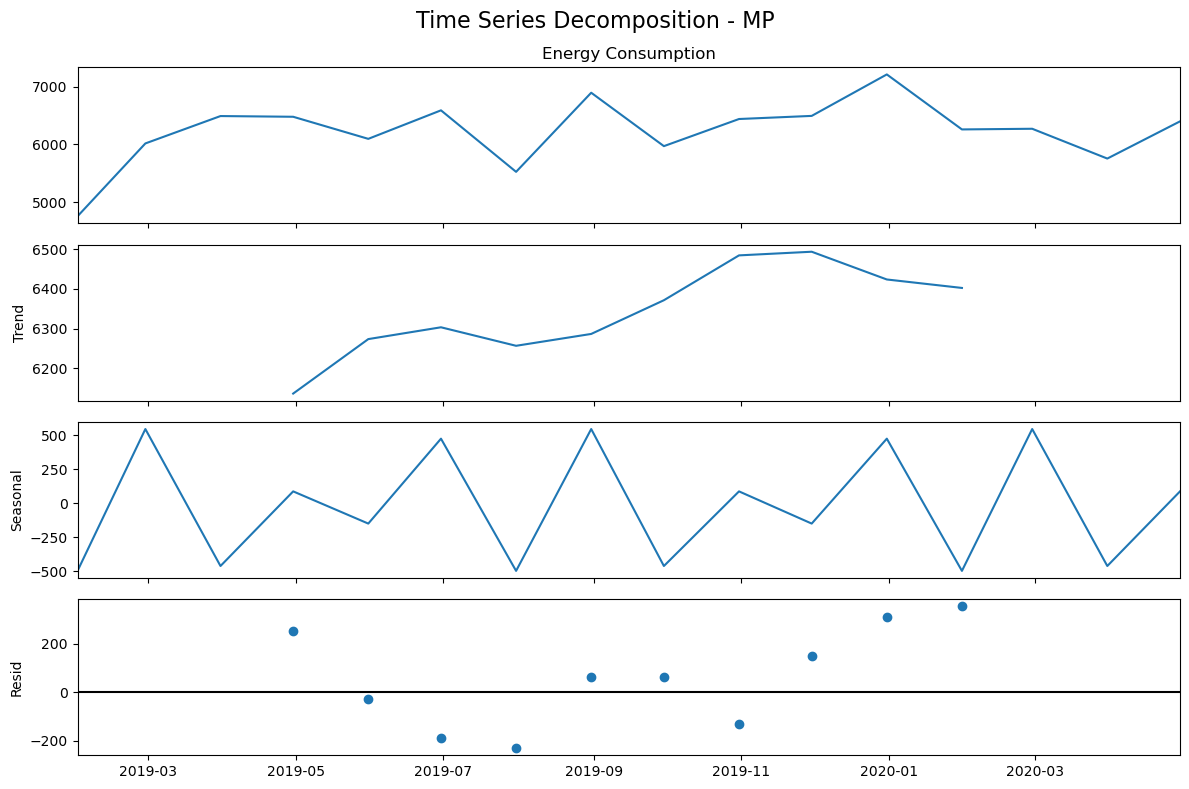

In [72]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Filter data for a specific state
state = 'MP'  # Ensure exact match
state_df = df[df['States'] == state].copy()

# Make sure the index is datetime (if already, this is safe)
state_df.index = pd.to_datetime(state_df.index)

# Resample to monthly frequency (e.g., sum of monthly consumption)
monthly_data = state_df['Energy Consumption'].resample('M').sum()

# Optional: fill missing values
monthly_data = monthly_data.fillna(method='ffill')

# Perform decomposition
decomposition = seasonal_decompose(monthly_data, model='additive', period=6)

# Plot
fig = decomposition.plot()
fig.set_size_inches(12, 8)
plt.suptitle(f'Time Series Decomposition - {state}', fontsize=16)
plt.tight_layout()
plt.show()


#Statistical Summaries

In [75]:
# Summary statistics for the whole dataset
summary_stats = df['Energy Consumption'].describe()
print(summary_stats)


count    15828.000000
mean       103.097012
std        116.024185
min          0.300000
25%          6.700000
50%         64.400000
75%        173.725000
max        522.100000
Name: Energy Consumption, dtype: float64


In [77]:
statewise_summary = df.groupby('States')['Energy Consumption'].describe()
print(statewise_summary)


                   count        mean        std    min      25%     50%  \
States                                                                    
Andhra Pradesh     480.0  176.001458  16.059207  130.6  163.475  174.10   
Arunachal Pradesh  478.0    2.110669   0.227167    1.1    2.100    2.10   
Assam              480.0   25.023542   4.771156   12.2   22.100   23.60   
Bihar              480.0   83.405833  15.020390   43.5   71.700   78.80   
Chandigarh         480.0    4.154583   1.155661    2.2    3.300    3.80   
Chhattisgarh       480.0   84.154792  10.050163   37.2   75.875   82.95   
DNH                480.0   16.455208   4.589670    1.3   17.400   18.20   
Delhi              480.0   83.762292  26.121279   41.8   63.475   73.15   
Goa                480.0   11.120625   1.534030    6.2   10.200   11.50   
Gujarat            480.0  322.906875  39.160120  192.3  301.900  325.10   
HP                 480.0   26.561042   4.819281   11.8   25.675   28.00   
Haryana            480.0 

In [81]:
regionwise_summary = df.groupby('Regions')['Energy Consumption'].agg(['mean', 'median', 'std', 'min', 'max'])
print(regionwise_summary)


               mean  median         std  min    max
Regions                                            
ER        65.743685    71.7   50.996778  0.3  198.5
NER        6.188362     2.5    8.025844  1.1   38.0
NR       112.095786    71.1  102.747269  2.2  471.8
SR       157.725877   171.4   97.364624  4.0  365.4
WR       178.864132   121.7  159.719711  1.3  522.1


In [85]:
monthly_avg = df.resample('ME')['Energy Consumption'].mean()
print(monthly_avg.head())


Date
2019-01-31    104.701455
2019-02-28    104.794481
2019-03-31     98.533920
2019-04-30    106.853131
2019-05-31    103.320430
Freq: ME, Name: Energy Consumption, dtype: float64


<Axes: title={'center': 'Monthly Average Energy Consumption'}, xlabel='Date'>

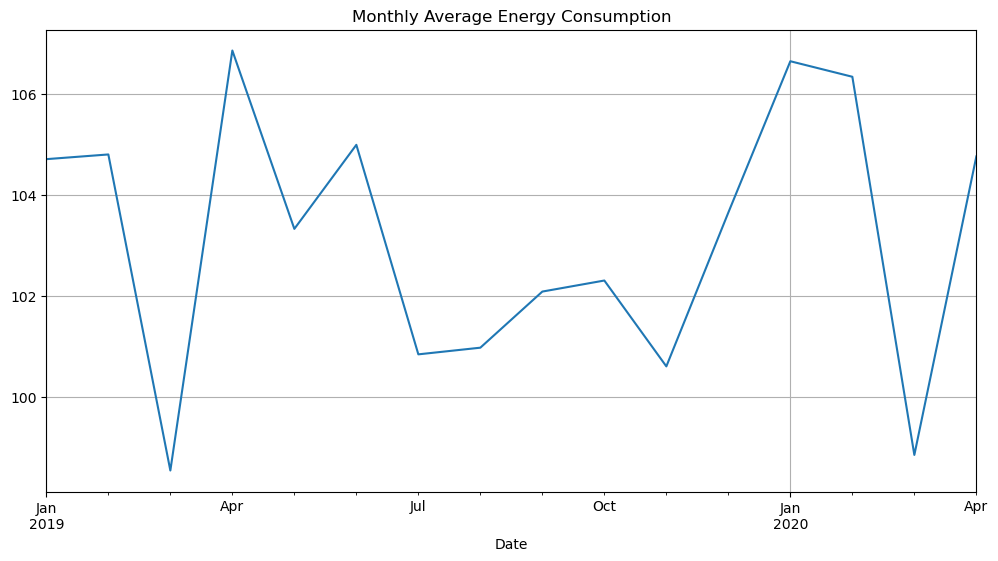

In [89]:
monthly_avg.plot(figsize=(12,6), title='Monthly Average Energy Consumption', grid=True)


In [95]:
statewise_mean_std = df.groupby('States')['Energy Consumption'].agg(['mean', 'std']).sort_values(by='mean', ascending=False)
print(statewise_mean_std)





                         mean        std
States                                  
Maharashtra        430.915417  42.749172
Gujarat            322.906875  39.160120
UP                 315.076667  67.027706
Tamil Nadu         300.402917  35.909834
Rajasthan          218.248750  27.590244
MP                 207.631875  30.705350
Karnataka          203.433542  30.190712
Telangana          186.624583  29.377052
Andhra Pradesh     176.001458  16.059207
Punjab             141.692500  57.432243
West Bengal        139.420208  27.971287
Haryana            138.819167  38.405211
Chhattisgarh        84.154792  10.050163
Delhi               83.762292  26.121279
Bihar               83.405833  15.020390
Odisha              80.615417  10.983526
Kerala              72.109583   6.968101
J&K                 44.163333   4.762303
Uttarakhand         36.225678   6.747446
HP                  26.561042   4.819281
Assam               25.023542   4.771156
Jharkhand           23.863333   1.949131
DNH             

In [97]:
top_states = statewise_mean_std.head()
bottom_states = statewise_mean_std.tail()

print("Top 5 States by Mean Energy Consumption:\n", top_states)
print("\nBottom 5 States by Mean Energy Consumption:\n", bottom_states)

Top 5 States by Mean Energy Consumption:
                    mean        std
States                            
Maharashtra  430.915417  42.749172
Gujarat      322.906875  39.160120
UP           315.076667  67.027706
Tamil Nadu   300.402917  35.909834
Rajasthan    218.248750  27.590244

Bottom 5 States by Mean Energy Consumption:
                        mean       std
States                               
Manipur            2.495833  0.224081
Nagaland           2.162762  0.145204
Arunachal Pradesh  2.110669  0.227167
Mizoram            1.710460  0.144557
Sikkim             1.279332  0.359641


C:\Users\Dell\AppData\Local\Temp\ipykernel_1528\3459808045.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_states.index, y=top_states['mean'], ax=axes[0], palette='viridis')
C:\Users\Dell\AppData\Local\Temp\ipykernel_1528\3459808045.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=bottom_states.index, y=bottom_states['mean'], ax=axes[1], palette='magma')


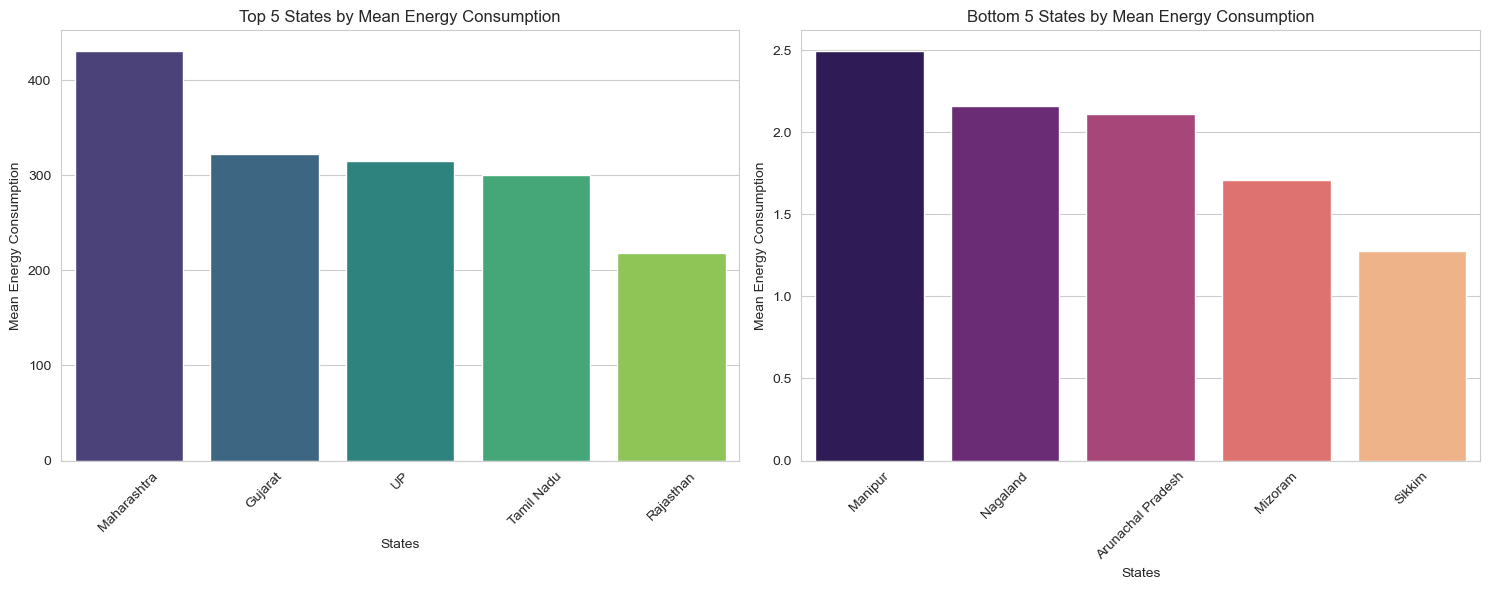

In [99]:
# Set plot style
sns.set_style('whitegrid')

# Create figure and axes
fig, axes = plt.subplots(1, 2, figsize=(15,6))

# Plot Top 5 States
sns.barplot(x=top_states.index, y=top_states['mean'], ax=axes[0], palette='viridis')
axes[0].set_title('Top 5 States by Mean Energy Consumption')
axes[0].set_ylabel('Mean Energy Consumption')
axes[0].set_xlabel('States')
axes[0].tick_params(axis='x', rotation=45)

# Plot Bottom 5 States
sns.barplot(x=bottom_states.index, y=bottom_states['mean'], ax=axes[1], palette='magma')
axes[1].set_title('Bottom 5 States by Mean Energy Consumption')
axes[1].set_ylabel('Mean Energy Consumption')
axes[1].set_xlabel('States')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

#Peak Load Analysis

In [102]:
# Assuming your dataframe `df` has columns: 'States' and 'Energy Consumption'

peak_load_by_state = df.groupby('States')['Energy Consumption'].max().sort_values(ascending=False)

print("Peak Load by State:")
print(peak_load_by_state)


Peak Load by State:
States
Maharashtra          522.1
UP                   471.8
Gujarat              400.8
Tamil Nadu           365.4
Punjab               300.0
Rajasthan            278.0
Karnataka            273.3
MP                   272.3
Telangana            256.2
Haryana              237.2
Andhra Pradesh       205.1
West Bengal          198.5
Delhi                147.1
Bihar                121.4
Odisha               113.0
Chhattisgarh         111.6
Kerala                89.4
J&K                   54.2
Uttarakhand           53.2
Assam                 38.0
HP                    34.0
Jharkhand             28.9
DNH                   19.5
Goa                   14.0
Pondy                  9.7
Chandigarh             7.4
Meghalaya              6.8
Tripura                6.6
Manipur                3.2
Sikkim                 2.8
Nagaland               2.7
Arunachal Pradesh      2.6
Mizoram                2.2
Name: Energy Consumption, dtype: float64


In [104]:
peak_load_dates = df.loc[df.groupby('States')['Energy Consumption'].idxmax()][['States', 'Energy Consumption']]
peak_load_dates = peak_load_dates.set_index('States')

print("Date/time of Peak Load per State:")
print(peak_load_dates)


Date/time of Peak Load per State:
           Energy Consumption
States                       
Punjab                   96.5
Haryana                 111.5
Rajasthan               213.6
Delhi                    60.2
UP                      240.9
...                       ...
Manipur                   2.5
Meghalaya                 5.7
Mizoram                   1.8
Nagaland                  2.1
Tripura                   5.1

[1089 rows x 1 columns]


C:\Users\Dell\AppData\Local\Temp\ipykernel_1528\446256691.py:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_peak = state_df.resample('M')['Energy Consumption'].max()


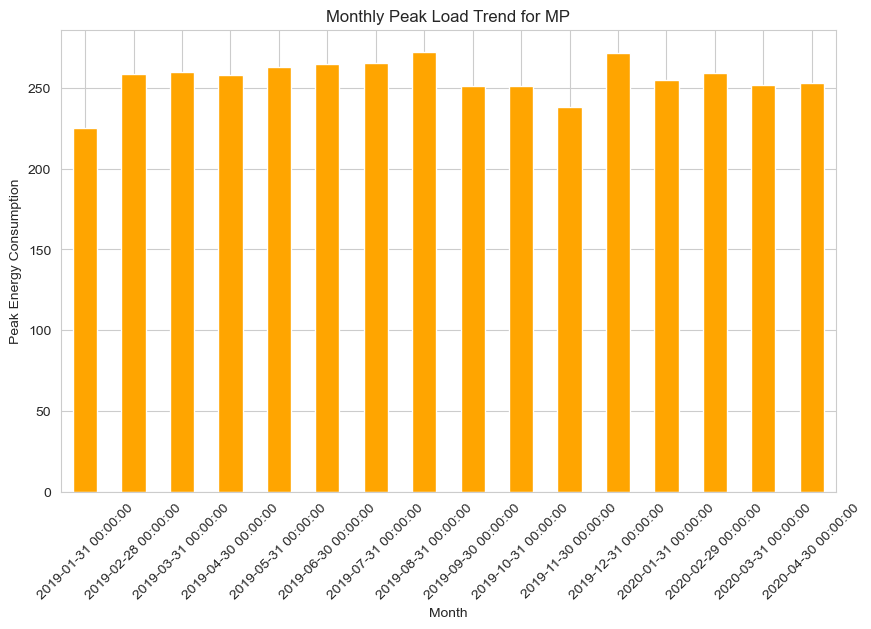

In [106]:
state = 'MP'
state_df = df[df['States'] == state]

# If Date is index and datetime
monthly_peak = state_df.resample('M')['Energy Consumption'].max()

plt.figure(figsize=(10,6))
monthly_peak.plot(kind='bar', color='orange')
plt.title(f'Monthly Peak Load Trend for {state}')
plt.xlabel('Month')
plt.ylabel('Peak Energy Consumption')
plt.xticks(rotation=45)
plt.show()


C:\Users\Dell\AppData\Local\Temp\ipykernel_1528\1467843354.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top5_states.index, y=top5_states.values, palette='Reds')


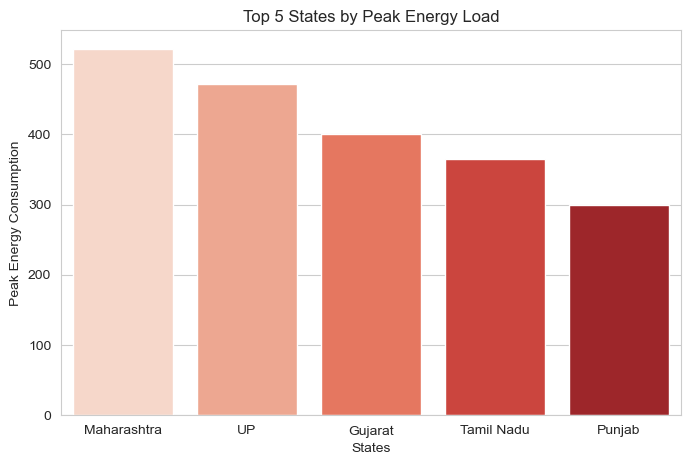

In [108]:
top5_states = peak_load_by_state.head()

plt.figure(figsize=(8,5))
sns.barplot(x=top5_states.index, y=top5_states.values, palette='Reds')
plt.title('Top 5 States by Peak Energy Load')
plt.ylabel('Peak Energy Consumption')
plt.xlabel('States')
plt.show()
